In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

For Classification Task

Load the dataset into a DataFrame object using the Pandas library.

In [2]:
df = pd.read_csv(r"C:\Users\LOQ\Machine Learning Assignment\Final Assesment\Life Expectancy Data.csv")
df.columns = df.columns.str.strip()

• Perform an initial analysis to gather a detailed description of the dataset. For example:

(a) When and by whom was the dataset created?

-> The dataset was created by the World Health Organization (WHO) in collaboration with the United Nations (for economic data). It aggregates health and economic indicators from 2000 to 2015 across 193 countries. The project acknowledges contributions from researchers like Deeksha Russell and Duan Wang, who compiled and merged data from WHO’s Global Health Observatory (GHO) and UN sources

(b) How did you access the dataset?

-> I accessed the that through Kaggle under the title "Life Expectency (WHO)"

(c) How does it align with the chosen UNSDG?

-> This dataset aligns closely with UNSDG 3: Good Health and Well-being, which aims to "ensure healthy lives and promote well-being for all at all ages.

(d) List all the attributes (columns) present in the dataset.

-> The dataset contains 22 columns which are:-
1. Country

2. Year (2000–2015)

3. Status (Developed/Developing)

4. Life Expectancy

5. Adult Mortality (deaths per 1000, ages 15–60)

6. Infant Deaths (per 1000)

7. Alcohol Consumption (liters per capita)

8. Percentage Expenditure (healthcare)

9. Hepatitis B Immunization (%)

10. Measles Cases (per 1000)

11. BMI (average)

12. Under-Five Deaths (per 1000)

13. Polio Immunization (%)

14. Total Expenditure (healthcare)

15. Diphtheria Immunization (%)

16. HIV/AIDS Deaths (per 1000)

17. GDP

18. Population

19. Thinness 1–19 Years (%)

20. Thinness 5–9 Years (%)

21. Income Composition of Resources (index 0–1)

22. Schooling (years)



• Identify potential questions that the dataset could help answer.

-> The potential questions that the dataset could help answer are:
1. How do immunization rates (e.g., polio, hepatitis B) correlate with life expectancy?

2. Does healthcare expenditure improve life expectancy in low-income countries?

3. What is the relationship between adult mortality and socioeconomic factors (e.g., GDP, schooling)?

4. How significant are lifestyle factors (BMI, alcohol consumption) in predicting lifespan?

5. Are densely populated countries more likely to have lower life expectancy?

• Assess the dataset’s suitability for analysis (e.g., data completeness, relevance, and quality).

-> The dataset has missing data (~5% of rows) for GDP, Hepatitis B, and population, especially in smaller nations (e.g., Vanuatu). The relevance is high as it covers critical health, economic, and social factors over 15 years and also aligns with SDG 3 priorities. The dataset is reliable as primary sources are WHO and UN.

2. Conducting Exploratory Data Analysis (EDA):

Understanding the characteristics of the data beforehand is crucial for building a model with
acceptable performance. Before proceeding to build, train, and test the model, write code to
inspect, preview, summarize, explore, and visualize your data.

Preview Data

In [3]:
print("First 5 rows:")
print("first 5 row")
print(df.head())

print("Last 5 rows")
print(df.tail())
print("\nDataset shape:", df.shape)

First 5 rows:
first 5 row
       Country  Year      Status  Life expectancy  Adult Mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   infant deaths  Alcohol  Percentage expenditure  Hepatitis B  Measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   
3             69     0.01               78.184215         67.0     2787  ...   
4             71     0.01                7.097109         68.0     3013  ...   

   Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  Populatio

In [4]:
print("Dataset Info:\n")
df.info()

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio

(a) Perform data cleaning and compute summary statistics for the dataset.

Handle missing values

In [5]:
print("Missing Values Before Handling:")
print(df.isnull().sum().sort_values(ascending=False))

Missing Values Before Handling:
Population                         652
Hepatitis B                        553
GDP                                448
Total expenditure                  226
Alcohol                            194
Income composition of resources    167
Schooling                          163
thinness 1-19 years                 34
thinness 5-9 years                  34
BMI                                 34
Diphtheria                          19
Polio                               19
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Status                               0
Country                              0
Year                                 0
under-five deaths                    0
Measles                              0
Percentage expenditure               0
HIV/AIDS                             0
dtype: int64


In [6]:
# Handle missing values in numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
for col in numeric_cols:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)

# Handle missing values in categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    mode_value = df[col].mode()[0] if not df[col].mode().empty else "Unknown"
    df[col] = df[col].fillna(mode_value)

# Country-specific imputation for health-related metrics
health_cols = ['Life expectancy', 'Adult Mortality', 'BMI', 'thinness 1-19 years', 'thinness 5-9 years']
for col in health_cols:
    country_medians = df.groupby('Country')[col].median()
    df[col] = df.apply(lambda row: country_medians[row['Country']] if pd.isnull(row[col]) else row[col], axis=1)
    global_median = df[col].median()
    df[col] = df[col].fillna(global_median)

# Status-based imputation for vaccination rates
vaccine_cols = ['Polio', 'Diphtheria', 'Hepatitis B']
for col in vaccine_cols:
    status_modes = df.groupby('Status')[col].agg(lambda x: x.mode()[0] if not x.mode().empty else x.median())
    df[col] = df.apply(lambda row: status_modes[row['Status']] if pd.isnull(row[col]) else row[col], axis=1)
    global_mode = df[col].mode()[0] if not df[col].mode().empty else df[col].median()
    df[col] = df[col].fillna(global_mode)

# Temporal filling for economic indicators
economic_cols = ['GDP', 'Population', 'Income composition of resources']
df = df.sort_values(['Country', 'Year'])
for col in economic_cols:
    df[col] = df.groupby('Country')[col].ffill()
    df[col] = df.groupby('Country')[col].bfill()
    global_median = df[col].median()
    df[col] = df[col].fillna(global_median)

#  Remaining columns (global median imputation)
remaining_cols = ['Alcohol', 'Schooling', 'Total expenditure']
for col in remaining_cols:
    global_median = df[col].median()
    df[col] = df[col].fillna(global_median)

# Final Validation
print("\nMissing Values After Enhanced Handling:")
print(df.isnull().sum().sort_values(ascending=False))


Missing Values After Enhanced Handling:
Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
Percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness 1-19 years                0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64


In [7]:
# Convert Categorical Target to Binary
if df['Status'].isna().sum() > 0:
    # Check if there are any non-null values to compute the mode
    if df['Status'].notna().sum() > 0:
        mode_status = df['Status'].mode()[0]
        df['Status'] = df['Status'].fillna(mode_status)
    else:
        # Handle the case where all values are NaN
        print("All values in 'Status' column are NaN. Setting a default value.")
        df['Status'] = 'Developing'  # or any other default value

df['Status'] = df['Status'].map({'Developing': 0, 'Developed': 1})
print("NaN values in Status after mapping:", df['Status'].isna().sum())

NaN values in Status after mapping: 0


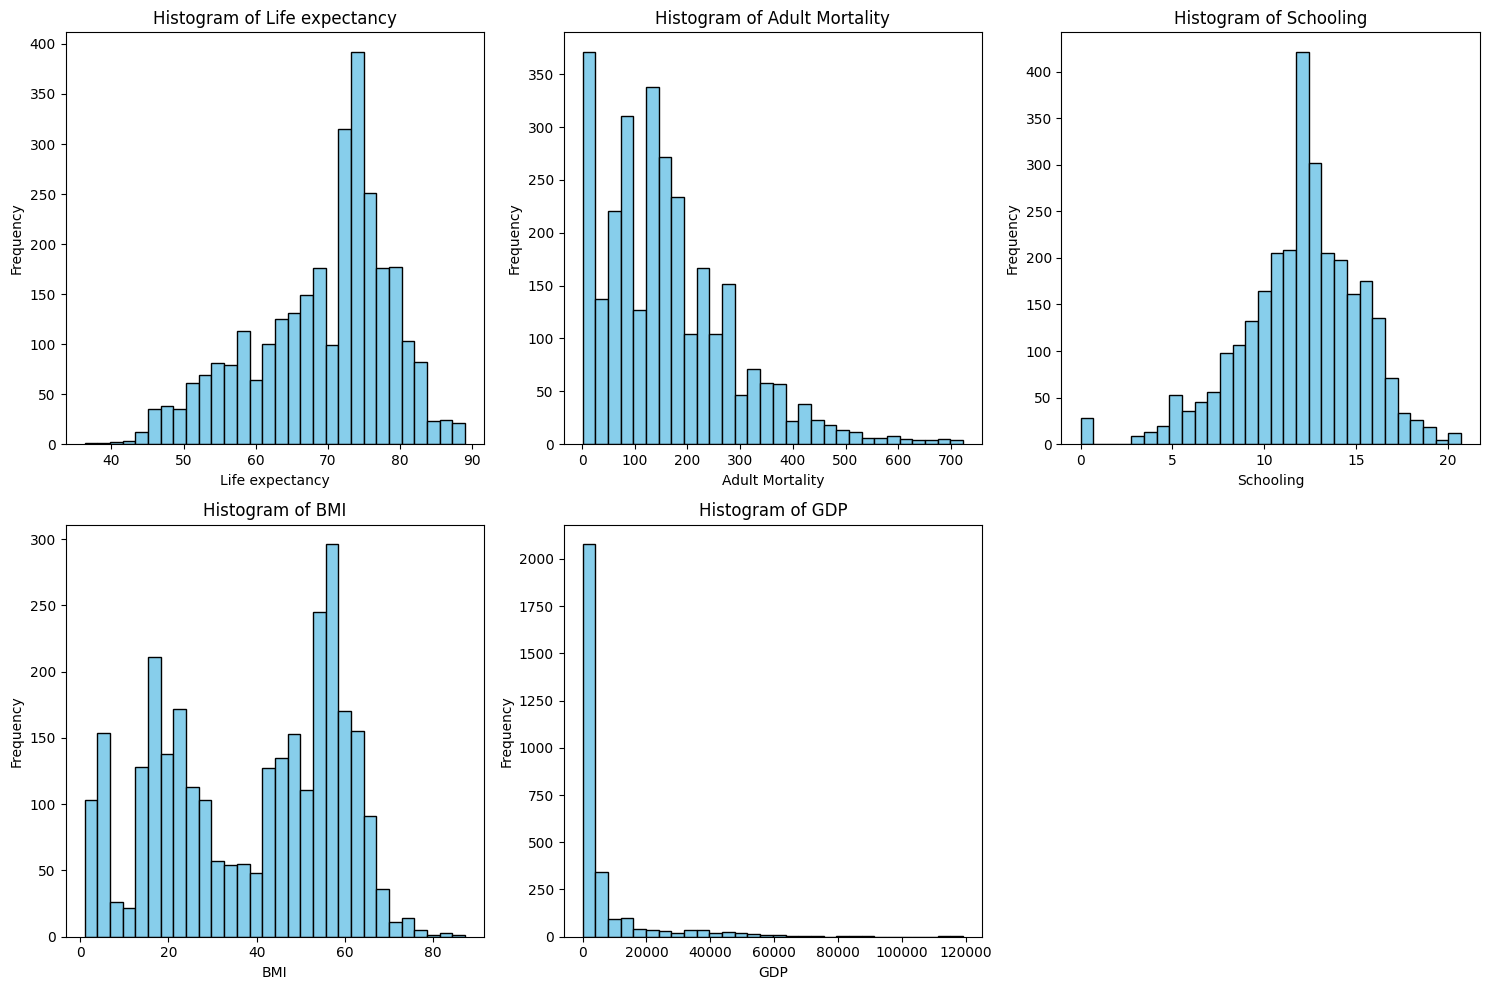

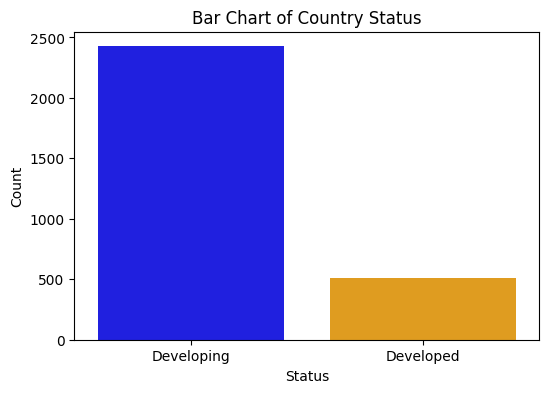

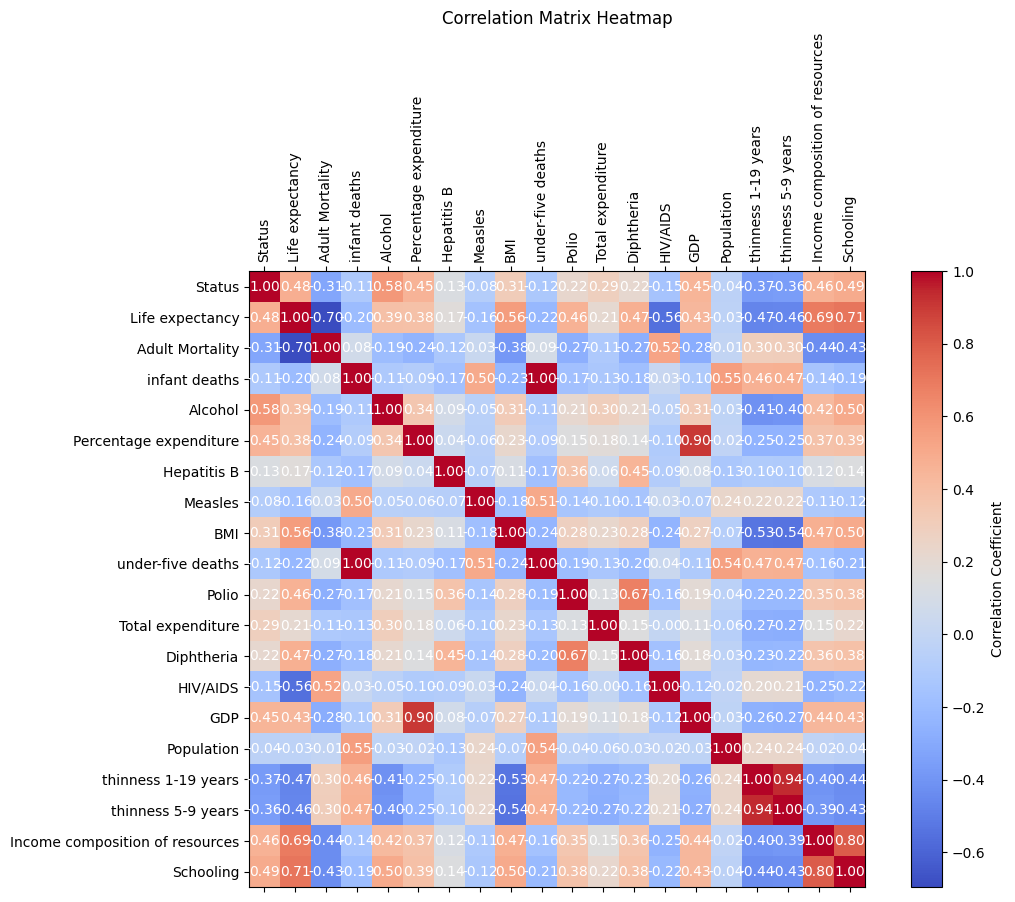

In [8]:
# Histograms for Numerical Features 
numerical_features = ['Life expectancy', 'Adult Mortality', 'Schooling', 'BMI', 'GDP']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Create a grid of subplots
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

for i, feature in enumerate(numerical_features):
    axes[i].hist(df[feature], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplot axes
for j in range(len(numerical_features), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# Bar Chart for Categorical Feature ('Status') 
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Status', hue='Status', palette=['blue', 'orange'], legend=False)
plt.xticks(ticks=[0, 1], labels=['Developing', 'Developed'])  # Map binary values to meaningful labels
plt.title('Bar Chart of Country Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()


#  Correlation Matrix Heatmap 
# Exclude non-numeric columns before computing the correlation matrix
# Drop 'Country' and 'Year' explicitly
numeric_data = df.select_dtypes(include=[np.number]).drop(columns=['Country', 'Year'], errors='ignore')

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap using subplots
fig, ax = plt.subplots(figsize=(12, 8))
cax = ax.matshow(correlation_matrix, cmap='coolwarm', interpolation='none')
fig.colorbar(cax, label='Correlation Coefficient')

# Add labels for readability
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=90)
ax.set_yticklabels(correlation_matrix.columns)

# Add correlation values on the heatmap
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        ax.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='white')

plt.title('Correlation Matrix Heatmap')
plt.show()

NaN values in X_train: Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
Percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness 1-19 years                0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64
NaN values in y_train: 0
Epoch 0: Loss = 0.6931
Epoch 100: Loss = 0.4971
Epoch 200: Loss = 0.4202
Epoch 300: Loss = 0.3727
Epoch 400: Loss = 0.3401
Epoch 500: Loss = 0.3165
Epoch 600: Loss = 0.2988
Epoch 700: Loss = 0.2850
Epoch 800: Loss = 0.2740
Epoch 900: Lo

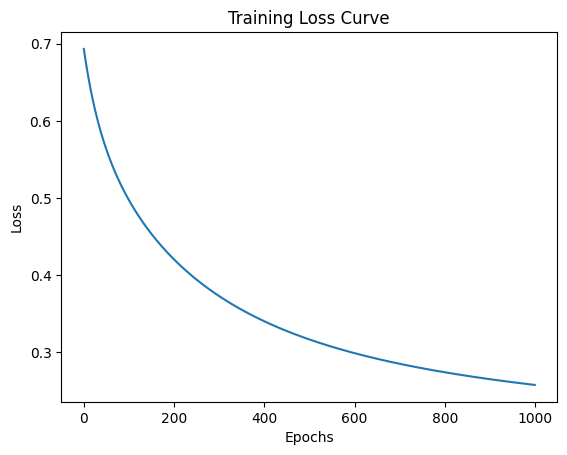

In [10]:
# Feature Selection
X = df.drop(columns=['Status','Country', 'Year'])
y = df['Status'].astype(int).values.reshape(-1, 1)

# Feature Scaling (Normalization)
std_dev = np.std(X, axis=0)
std_dev[std_dev == 0] = 1  # Avoid division by zero
X = (X - np.mean(X, axis=0)) / std_dev

# Train-Test Split (80-20)
np.random.seed(42)
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
train_size = int(0.8 * X.shape[0])

# Use .iloc[] for indexing Pandas DataFrames
X_train, X_test = X.iloc[indices[:train_size]], X.iloc[indices[train_size:]]
y_train, y_test = y[indices[:train_size]], y[indices[train_size:]]

# Check for NaN values
print("NaN values in X_train:", np.isnan(X_train).sum())
print("NaN values in y_train:", np.isnan(y_train).sum())

# Sigmoid Function
def sigmoid(z):
    z = np.clip(z, -500, 500)  # Prevent overflow
    return 1 / (1 + np.exp(-z))

# Binary Cross-Entropy Loss
def binary_cross_entropy(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Logistic Regression Model
def train_logistic_regression(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros((n, 1))
    bias = 0
    losses = []
    
    for epoch in range(epochs):
        z = np.dot(X, theta) + bias
        y_pred = sigmoid(z)
        
        error = y_pred - y
        d_theta = (1/m) * np.dot(X.T, error)
        d_bias = (1/m) * np.sum(error)
        
        theta -= lr * d_theta
        bias -= lr * d_bias
        
        loss = binary_cross_entropy(y, y_pred)
        losses.append(loss)
        
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss = {loss:.4f}")
    
    return theta, bias, losses

# Train Model
theta, bias, losses = train_logistic_regression(X_train, y_train, lr=0.01, epochs=1000)

# Plot Loss Curve
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()

Select relevant features and target

In [39]:
X = df.drop(columns=['Status','Country', 'Year'])
y = df['Status']

Train-test split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standardize the features

In [41]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model 1 - Basic Logistic Regression

In [42]:
# Train Logistic Regression Model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_log_reg:.4f}")
print(f"Precision: {precision_log_reg:.4f}")
print(f"Recall: {recall_log_reg:.4f}")
print(f"F1-Score: {f1_log_reg:.4f}")

Logistic Regression Results:
Accuracy: 0.9337
Precision: 0.7525
Recall: 0.8444
F1-Score: 0.7958


Model 2 - Random Forest

In [43]:
# Train Random Forest Model
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("\nRandom Forest Results:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")


Random Forest Results:
Accuracy: 0.9864
Precision: 0.9362
Recall: 0.9778
F1-Score: 0.9565


 Compare Results

In [44]:
# Print comparison
print("\nComparison of Models:")
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.4f}, F1-Score: {f1_log_reg:.4f}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}, F1-Score: {f1_rf:.4f}")

if accuracy_rf > accuracy_log_reg:
    print("\nRandom Forest performed better.")
else:
    print("\nLogistic Regression performed better.")


Comparison of Models:
Logistic Regression Accuracy: 0.9337, F1-Score: 0.7958
Random Forest Accuracy: 0.9864, F1-Score: 0.9565

Random Forest performed better.


Hyperparameter Optimization for Logistic Regression (Model 1)

In [45]:
# Define parameter grid for Logistic Regression
param_grid_log_reg = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Optimization algorithms
    'penalty': ['l1', 'l2']  # Regularization type
}

# Initialize GridSearchCV for Logistic Regression
grid_search_log_reg = GridSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_grid=param_grid_log_reg,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    n_jobs=-1  # Use all available cores
)

# Fit the model
grid_search_log_reg.fit(X_train, y_train)

# Get the best parameters and best score
best_params_log_reg = grid_search_log_reg.best_params_
best_score_log_reg = grid_search_log_reg.best_score_

print("\nBest Parameters for Logistic Regression:")
print(best_params_log_reg)
print(f"Best Cross-Validation Accuracy: {best_score_log_reg:.4f}")


Best Parameters for Logistic Regression:
{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.9306


C:\Users\LOQ\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LOQ\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\LOQ\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\LOQ\AppData\Local

Hyperparameter Optimization for Random Forest (Model 2)

In [46]:
# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    n_jobs=-1  # Use all available cores
)

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("\nBest Parameters for Random Forest:")
print(best_params_rf)
print(f"Best Cross-Validation Accuracy: {best_score_rf:.4f}")


Best Parameters for Random Forest:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.9809


Logistic Regression with Best Parameters:

In [47]:
# Train Logistic Regression with best parameters
best_log_reg = LogisticRegression(**best_params_log_reg, random_state=42)
best_log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_best_log_reg = best_log_reg.predict(X_test)

# Evaluate the model
accuracy_best_log_reg = accuracy_score(y_test, y_pred_best_log_reg)
f1_best_log_reg = f1_score(y_test, y_pred_best_log_reg)

print("\nOptimized Logistic Regression Results:")
print(f"Accuracy: {accuracy_best_log_reg:.4f}")
print(f"F1-Score: {f1_best_log_reg:.4f}")


Optimized Logistic Regression Results:
Accuracy: 0.9371
F1-Score: 0.8000


Random Forest with Best Parameters:

In [48]:
# Train Random Forest with best parameters
best_rf = RandomForestClassifier(**best_params_rf, random_state=42)
best_rf.fit(X_train, y_train)

# Predict on the test set
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate the model
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
f1_best_rf = f1_score(y_test, y_pred_best_rf)

print("\nOptimized Random Forest Results:")
print(f"Accuracy: {accuracy_best_rf:.4f}")
print(f"F1-Score: {f1_best_rf:.4f}")


Optimized Random Forest Results:
Accuracy: 0.9864
F1-Score: 0.9565


Compare Results

In [49]:
# Print comparison
print("\nComparison of Optimized Models:")
print(f"Optimized Logistic Regression Accuracy: {accuracy_best_log_reg:.4f}, F1-Score: {f1_best_log_reg:.4f}")
print(f"Optimized Random Forest Accuracy: {accuracy_best_rf:.4f}, F1-Score: {f1_best_rf:.4f}")

if accuracy_best_rf > accuracy_best_log_reg:
    print("\nOptimized Random Forest performed better.")
else:
    print("\nOptimized Logistic Regression performed better.")


Comparison of Optimized Models:
Optimized Logistic Regression Accuracy: 0.9371, F1-Score: 0.8000
Optimized Random Forest Accuracy: 0.9864, F1-Score: 0.9565

Optimized Random Forest performed better.


Feature Selection for Logistic Regression (Model 1)

In [58]:
# Initialize Logistic Regression as the base estimator
log_reg = LogisticRegression(random_state=42)

# Perform Recursive Feature Elimination (RFE)
rfe_log_reg = RFE(estimator=log_reg, n_features_to_select=10)  # Select top 5 features
rfe_log_reg.fit(X_train, y_train)

# Get the selected features
selected_features_log_reg = X.columns[rfe_log_reg.support_]

print("\nBest Features for Logistic Regression:")
print(selected_features_log_reg)


Best Features for Logistic Regression:
Index(['Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'Hepatitis B', 'HIV/AIDS', 'Population', 'thinness 1-19 years',
       'thinness 5-9 years', 'Income composition of resources'],
      dtype='object')


Feature Selection for Random Forest (Model 2)

In [59]:
# Train Random Forest with default parameters
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Get feature importances
feature_importances_rf = rf_clf.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances_rf
}).sort_values(by='Importance', ascending=False)

# Select top 5 features
top_features_rf = feature_importance_df.head(10)['Feature'].values

print("\nBest Features for Random Forest:")
print(top_features_rf)


Best Features for Random Forest:
['Life expectancy' 'Income composition of resources' 'Alcohol' 'Schooling'
 'thinness 5-9 years' 'thinness 1-19 years' 'BMI' 'Adult Mortality'
 'Total expenditure' 'GDP']


Logistic Regression with Selected Features:

In [60]:
# Select the best features for Logistic Regression
X_train_log_reg = X_train[:, rfe_log_reg.support_]
X_test_log_reg = X_test[:, rfe_log_reg.support_]

# Train Logistic Regression with selected features
best_log_reg = LogisticRegression(random_state=42)
best_log_reg.fit(X_train_log_reg, y_train)

# Predict on the test set
y_pred_log_reg = best_log_reg.predict(X_test_log_reg)

# Evaluate the model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

print("\nLogistic Regression Results with Selected Features:")
print(f"Accuracy: {accuracy_log_reg:.4f}")
print(f"F1-Score: {f1_log_reg:.4f}")


Logistic Regression Results with Selected Features:
Accuracy: 0.9354
F1-Score: 0.8021


Random Forest with Selected Features:

In [62]:
# Select the best features for Random Forest
X_train_rf = X_train[:, [list(X.columns).index(feature) for feature in top_features_rf]]
X_test_rf = X_test[:, [list(X.columns).index(feature) for feature in top_features_rf]]

# Train Random Forest with selected features
best_rf = RandomForestClassifier(random_state=42)
best_rf.fit(X_train_rf, y_train)

# Predict on the test set
y_pred_rf = best_rf.predict(X_test_rf)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("\nRandom Forest Results with Selected Features:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")


Random Forest Results with Selected Features:
Accuracy: 0.9864
F1-Score: 0.9560


Compare Results

In [63]:
# Print comparison
print("\nComparison of Models with Selected Features:")
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.4f}, F1-Score: {f1_log_reg:.4f}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}, F1-Score: {f1_rf:.4f}")

if accuracy_rf > accuracy_log_reg:
    print("\nRandom Forest performed better with selected features.")
else:
    print("\nLogistic Regression performed better with selected features.")


Comparison of Models with Selected Features:
Logistic Regression Accuracy: 0.9354, F1-Score: 0.8021
Random Forest Accuracy: 0.9864, F1-Score: 0.9560

Random Forest performed better with selected features.


Rebuild the Final Model with Best Hyperparameter

In [71]:
# Top features for Random Forest (from previous step)
top_features_rf = ['Life expectancy', 'Income composition of resources', 'Alcohol', 'Schooling',
                   'thinness 5-9 years', 'thinness 1-19 years', 'BMI', 'Adult Mortality',
                   'Total expenditure', 'GDP']

# Filter the dataset to include only the top features
X_train_final = X_train[:, [list(X.columns).index(feature) for feature in top_features_rf]]
X_test_final = X_test[:, [list(X.columns).index(feature) for feature in top_features_rf]]

Train the Final Model with Best Hyperparameters

In [72]:
# Best hyperparameters for Random Forest (from previous step)
best_params_rf = {
    'max_depth': None,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 100
}

# Train the final Random Forest model
final_rf = RandomForestClassifier(**best_params_rf, random_state=42)
final_rf.fit(X_train_final, y_train)

# Predict on the test set
y_pred_final = final_rf.predict(X_test_final)

# Evaluate the final model
accuracy_final = accuracy_score(y_test, y_pred_final)
f1_final = f1_score(y_test, y_pred_final)

print("\nFinal Random Forest Model Results:")
print(f"Accuracy: {accuracy_final:.4f}")
print(f"F1-Score: {f1_final:.4f}")


Final Random Forest Model Results:
Accuracy: 0.9864
F1-Score: 0.9560


In [73]:
# Print comparison
print("\nComparison of Models:")
print(f"Previous Optimized Random Forest Accuracy: {accuracy_best_rf:.4f}, F1-Score: {f1_best_rf:.4f}")
print(f"Final Random Forest Model Accuracy: {accuracy_final:.4f}, F1-Score: {f1_final:.4f}")

if accuracy_final > accuracy_best_rf:
    print("\nThe Final Model's Performance Improved!")
else:
    print("\nThe Final Model's Performance Did Not Improve.")


Comparison of Models:
Previous Optimized Random Forest Accuracy: 0.9864, F1-Score: 0.9565
Final Random Forest Model Accuracy: 0.9864, F1-Score: 0.9560

The Final Model's Performance Did Not Improve.
